In [ ]:
import numpy as np
import os

import tensorflow as tf
#from tensorflow import keras as tfk
import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
#from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl


print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")

Tensorflow version -> 2.17.0
Keras version -> 3.4.1


### Clear GPU

In [2]:
from keras import backend as K

K.clear_session()

In [1]:
import tensorflow as tf
from numba import cuda
import gc

def clear_memory():
    # Clear VRAM
    tf.keras.backend.clear_session()
    cuda.select_device(0)
    cuda.close()

    # Clear RAM
    gc.collect()

#This should clear the VRAM and RAM
clear_memory()

2024-11-17 19:39:55.807985: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 19:39:59.997303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 19:40:01.446410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 19:40:01.781476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 19:40:03.300461: I tensorflow/core/platform/cpu_feature_guar

### Import the Datasets in my drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
training_set_path = '/content/drive/My Drive/[2024-2025] AN2DL/Homework 1'
folder_path = '/content/drive/My Drive/Datasets'

### Check GPU Existence and Status




In [ ]:
import tensorflow as tf

# List all GPUs TensorFlow detects
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow detected the following GPU(s):")
    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print(f"Name: {details['device_name']}")

TensorFlow detected the following GPU(s):
Name: NVIDIA GeForce RTX 2070 SUPER


I0000 00:00:1731609535.360732    5136 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [2]:
#This is to check GPU-Status and Usage (works only for NVIDIA GPUs)
!nvidia-smi

physical_devices = tf.config.list_physical_devices('GPU')
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

Sun Nov 17 19:40:26 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2070 ...    Off |   00000000:01:00.0  On |                  N/A |
|  0%   39C    P0             74W /  215W |     765MiB /   8192MiB |     20%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

I0000 00:00:1731868826.669635    4203 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731868828.832676    4203 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731868828.834151    4203 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


### Check Tensorflow and Keras Version


In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

### Import all the libraries

In [3]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
import keras as tfk
from keras import layers as tfkl
from keras import regularizers

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

#Number of Classes in the Dataset
num_classes = 8

2.17.0


### Create a function to Load Data and load the datasets needed


In [4]:
def load_data(path):
    # Load dataset from .npz file
    data = np.load(path)

    # Trim dataset to the first 11959 entries and discard the rest
    train_dataset = data['images'][:11959].copy()  # Copy to ensure no reference to the original array
    test_dataset = data['labels'][:11959].copy()

    # Explicitly delete the original data to free up memory
    del data

    return train_dataset, test_dataset

In [5]:
def load_data(path):
    # Load dataset from .npz file
    data = np.load(path)

    # Trim dataset to the first 11959 entries and discard the rest
    train_dataset = data['images'].copy()  # Copy to ensure no reference to the original array
    test_dataset = data['labels'].copy()

    # Explicitly delete the original data to free up memory
    del data

    return train_dataset, test_dataset

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

def split_dataset(X, y, test_size=0.1, val_size=0.2, random_state=42):
    """
    Split dataset into train, validation and test sets.
    
    Args:
        X: Input features
        y: Labels
        test_size: Proportion of dataset to include in the test split
        val_size: Proportion of training dataset to include in the validation split
        random_state: Random state for reproducibility
    
    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test
    """
    # Reshape y to have shape (n, 1)
    y = y.reshape(-1, 1)

    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )
    
    # Second split: separate validation set from training set
    # val_size is adjusted to account for the reduced size of X_temp
    val_size_adjusted = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp,
        test_size=val_size_adjusted,
        random_state=random_state,
        stratify=y_temp
    )
    
    print("Dataset shapes:")
    print(f"Training:   {X_train.shape} - {y_train.shape}")
    print(f"Validation: {X_val.shape} - {y_val.shape}")
    print(f"Test:      {X_test.shape} - {y_test.shape}")
    
    return X_train, X_val, X_test, y_train, y_val, y_test


def compute_class_weights(y):
    """
    Compute class weights for imbalanced dataset.
    
    Args:
        y: Labels (before one-hot encoding)
    
    Returns:
        Dictionary with class weights
    """
    # Get the original class labels (assuming y is shaped (n, 1))
    y = y.reshape(-1)
    
    # Get unique classes
    classes = np.unique(y)
    
    # Compute class weights
    weights = compute_class_weight(
        class_weight='balanced',
        classes=classes,
        y=y
    )
    
    # Create dictionary of class weights
    class_weights = dict(zip(classes, weights))
    
    # Print class distribution and weights
    print("\nClass distribution and weights:")
    for class_id in classes:
        count = np.sum(y == class_id)
        percentage = count / len(y) * 100
        print(f"Class {class_id}: {count} samples ({percentage:.1f}%) - Weight: {class_weights[class_id]:.3f}")
    
    return class_weights


# Execute function and load data
(X, y) = load_data( "removed_dataset.npz")

# Split the dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

# Compute class weights using training data
class_weights = compute_class_weights(y_train)

# Convert labels to categorical (one-hot encoding)
y_train = tfk.utils.to_categorical(y_train, num_classes=8)
y_val = tfk.utils.to_categorical(y_val, num_classes=8)
y_test = tfk.utils.to_categorical(y_test, num_classes=8)

Dataset shapes:
Training:   (8365, 96, 96, 3) - (8365, 1)
Validation: (2390, 96, 96, 3) - (2390, 1)
Test:      (1196, 96, 96, 3) - (1196, 1)

Class distribution and weights:
Class 0: 595 samples (7.1%) - Weight: 1.757
Class 1: 1525 samples (18.2%) - Weight: 0.686
Class 2: 759 samples (9.1%) - Weight: 1.378
Class 3: 1416 samples (16.9%) - Weight: 0.738
Class 4: 594 samples (7.1%) - Weight: 1.760
Class 5: 695 samples (8.3%) - Weight: 1.504
Class 6: 1631 samples (19.5%) - Weight: 0.641
Class 7: 1150 samples (13.7%) - Weight: 0.909


### Define The First - Model

In [21]:
# Initialise MobileNetV3Small model with pretrained weights, for transfer learning
mobilenet =  tf.keras.applications.ConvNeXtXLarge(
    include_top=False,             # Esclude il classificatore finale
    input_shape=(96, 96, 3),       # Dimensioni di input
    weights="imagenet",            # Pesi preaddestrati su ImageNet
    input_tensor=None,             # Tensor di input (lascia None per usare input_shape)
    pooling=None,                  # Nessun pooling; specifica 'avg' per GlobalAveragePooling
    classes=8,                     # Numero di classi (non usato se include_top=False)
    classifier_activation="softmax" # Attivazione del classificatore (non usato se include_top=False)
)


# Display a summary of the model architecture
mobilenet.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
# Specify 'to_file' argument with a path where you have write permissions
tfk.utils.plot_model(mobilenet, to_file='/tmp/model.png', expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor
mobilenet.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')

"""
# Definisci il pipeline completo di augmentazione
augmentation = tf.keras.Sequential([
    # Altre augmentazioni indipendenti
    tfkl.RandomCrop(height=96, width=96),  # Regola la dimensione del crop se necessario
    tfkl.RandomFlip("horizontal_and_vertical"),
    tfkl.RandomRotation(0.3),
    tfkl.Dropout(0.1),
    tfkl.Dropout(0.2),
    tfkl.RandomContrast(0.3),
    tfkl.RandomZoom(0.15),
    tfkl.RandomBrightness(0.1),
], name='advanced_preprocessing')


#Apply the augmentation pipeline
inputs = augmentation(inputs)
"""

# Pass augmented inputs through the MobileNetV3Small feature extractor
x = mobilenet(inputs)

x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Add a batch normalization layer
x = tfkl.BatchNormalization(name='batch_norm')(x)

# Add a dropout layer for regularization
x = tfkl.Dropout(0.4, name='dropout')(x)

# Add a dense layer with 256 units and GELU activation
x = tfkl.Dense(256, activation='gelu', name='dense1')(x)


# Add layer normalizatiFinal_Project.ipynbon
x = tfkl.LayerNormalization(name='layer_norm1')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout2')(x)

# Add a second dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense2')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm2')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout3')(x)

# Add a third dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense3')(x)
'''
# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm3')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout4')(x)
'''
# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(8, activation='softmax', name='output')(x)

# Define the complete model linking input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with categorical cross-entropy loss and Lion optimiser
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer= tfk.optimizers.Adam(), metrics=['accuracy'])

# Display a summary of the model architecture
tl_model.summary(expand_nested=True)

### Train First - Model


In [23]:
# Train the model
initial_epochs = 50

tl_history = tl_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=initial_epochs,
    class_weight=class_weights,
    callbacks=[
        tfk.callbacks.EarlyStopping(
            monitor='val_accuracy',
            mode='max',
            patience=20,
            restore_best_weights=True,
            verbose=1
        ),
        tfk.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-7,
            verbose=1
        ),
        # Aggiungi ModelCheckpoint per salvare i migliori modelli
        tfk.callbacks.ModelCheckpoint(
            'best_model_{epoch:02d}_{val_accuracy:.3f}.keras',
            monitor='val_accuracy',
            mode='max',
            save_best_only=True,
            verbose=1
        )
    ]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file, including final accuracy in the filename
#model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
#tl_model.save(model_filename)

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
tl_model.save(model_filename)

Epoch 1/12
561/561 ━━━━━━━━━━━━━━━━━━━━ 73s 87ms/step - accuracy: 0.4566 - loss: 1.4812 - val_accuracy: 0.5399 - val_loss: 1.2646
Epoch 2/12
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.6435 - loss: 1.0084 - val_accuracy: 0.5731 - val_loss: 1.1848
Epoch 3/12
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.6694 - loss: 0.9267 - val_accuracy: 0.5980 - val_loss: 1.1269
Epoch 4/12
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.6838 - loss: 0.8871 - val_accuracy: 0.6022 - val_loss: 1.1185
Epoch 5/12
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.6920 - loss: 0.8659 - val_accuracy: 0.6078 - val_loss: 1.1074
Epoch 6/12
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.6988 - loss: 0.8436 - val_accuracy: 0.6126 - val_loss: 1.0882
Epoch 7/12
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.7080 - loss: 0.8283 - val_accuracy: 0.6142 - val_loss: 1.0841
Epoch 8/12
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.7150 - loss: 0.8114 - 

### Test the First - Model


In [24]:
# Generate predictions on the test set and print a classification report
y_pred = tl_model.predict(X_test_aug6)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug6.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

del tl_model

374/374 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.44      0.52       852
           1       0.63      0.74      0.68      2181
           2       0.64      0.48      0.55      1209
           3       0.59      0.53      0.56      1902
           4       0.55      0.51      0.53       900
           5       0.49      0.42      0.45      1086
           6       0.65      0.64      0.65      2432
           7       0.62      0.89      0.73      1397

    accuracy                           0.61     11959
   macro avg       0.60      0.58      0.58     11959
weighted avg       0.61      0.61      0.60     11959



### First Fine - Tuning


In [25]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_62.2.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 349,891,610 (1.30 GB)

 Trainable params: 579,848 (2.21 MB)

 Non-trainable params: 348,152,064 (1.30 GB)

 Optimizer params: 1,159,698 (4.42 MB)

In [26]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('convnext_xlarge').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('convnext_xlarge').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

3 convnext_xlarge_stage_0_block_0_depthwise_conv Conv2D True
10 convnext_xlarge_stage_0_block_1_depthwise_conv Conv2D True
17 convnext_xlarge_stage_0_block_2_depthwise_conv Conv2D True
25 convnext_xlarge_stage_1_block_0_depthwise_conv Conv2D True
32 convnext_xlarge_stage_1_block_1_depthwise_conv Conv2D True
39 convnext_xlarge_stage_1_block_2_depthwise_conv Conv2D True
47 convnext_xlarge_stage_2_block_0_depthwise_conv Conv2D True
54 convnext_xlarge_stage_2_block_1_depthwise_conv Conv2D True
61 convnext_xlarge_stage_2_block_2_depthwise_conv Conv2D True
68 convnext_xlarge_stage_2_block_3_depthwise_conv Conv2D True
75 convnext_xlarge_stage_2_block_4_depthwise_conv Conv2D True
82 convnext_xlarge_stage_2_block_5_depthwise_conv Conv2D True
89 convnext_xlarge_stage_2_block_6_depthwise_conv Conv2D True
96 convnext_xlarge_stage_2_block_7_depthwise_conv Conv2D True
103 convnext_xlarge_stage_2_block_8_depthwise_conv Conv2D True
110 convnext_xlarge_stage_2_block_9_depthwise_conv Conv2D True
117 con

In [27]:
# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

In [28]:
# Compile the model with categorical cross-entropy loss and Adam optimiser
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

In [29]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test_concat_d,
    y = y_test_concat_d,
    batch_size = 32,
    epochs = 7,
    validation_data = (X_test_aug5, y_test_aug5),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

del ft_model

Epoch 1/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 113s 67ms/step - accuracy: 0.7147 - loss: 0.8248 - val_accuracy: 0.7143 - val_loss: 0.8176
Epoch 2/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.8007 - loss: 0.5902 - val_accuracy: 0.7231 - val_loss: 0.8200
Epoch 3/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.8468 - loss: 0.4591 - val_accuracy: 0.7283 - val_loss: 0.8399
Epoch 4/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.8785 - loss: 0.3661 - val_accuracy: 0.7300 - val_loss: 0.8714
Epoch 5/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.9060 - loss: 0.2923 - val_accuracy: 0.7273 - val_loss: 0.9881
Epoch 6/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.9250 - loss: 0.2424 - val_accuracy: 0.7253 - val_loss: 1.0388
Epoch 7/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.9322 - loss: 0.2169 - val_accuracy: 0.7261 - val_loss: 1.1030
Final validation accuracy: 73.0%


### Second Fine - Tuning

In [44]:
# Re-load the model after transfer learning
ft_model = tfk.models.load_model('/content/Blood_Cells_MobileNetV3S_73.0.keras')
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 352,144,410 (1.31 GB)

 Trainable params: 1,706,248 (6.51 MB)

 Non-trainable params: 347,025,664 (1.29 GB)

 Optimizer params: 3,412,498 (13.02 MB)

In [45]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('convnext_xlarge').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('convnext_xlarge').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

3 convnext_xlarge_stage_0_block_0_depthwise_conv Conv2D True
10 convnext_xlarge_stage_0_block_1_depthwise_conv Conv2D True
17 convnext_xlarge_stage_0_block_2_depthwise_conv Conv2D True
25 convnext_xlarge_stage_1_block_0_depthwise_conv Conv2D True
32 convnext_xlarge_stage_1_block_1_depthwise_conv Conv2D True
39 convnext_xlarge_stage_1_block_2_depthwise_conv Conv2D True
47 convnext_xlarge_stage_2_block_0_depthwise_conv Conv2D True
54 convnext_xlarge_stage_2_block_1_depthwise_conv Conv2D True
61 convnext_xlarge_stage_2_block_2_depthwise_conv Conv2D True
68 convnext_xlarge_stage_2_block_3_depthwise_conv Conv2D True
75 convnext_xlarge_stage_2_block_4_depthwise_conv Conv2D True
82 convnext_xlarge_stage_2_block_5_depthwise_conv Conv2D True
89 convnext_xlarge_stage_2_block_6_depthwise_conv Conv2D True
96 convnext_xlarge_stage_2_block_7_depthwise_conv Conv2D True
103 convnext_xlarge_stage_2_block_8_depthwise_conv Conv2D True
110 convnext_xlarge_stage_2_block_9_depthwise_conv Conv2D True
117 con

In [46]:
# Set the number of layers to freeze
N = 70

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Output hidden; open in https://colab.research.google.com to view.

In [47]:
# Compile the model with categorical cross-entropy loss and Adam optimiser
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Enable mixed precision
tfk.mixed_precision.set_global_policy('mixed_float16')

In [48]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test_concat2,
    y = y_test_concat2,
    batch_size = 64,
    epochs = 5,
    validation_data = (X_test_aug4, y_test_aug4),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=False)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug2)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug2.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug3)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug3.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))



Epoch 1/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 92s 107ms/step - accuracy: 0.8543 - loss: 0.4552 - val_accuracy: 0.9786 - val_loss: 0.0641
Epoch 2/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9086 - loss: 0.2961 - val_accuracy: 0.9752 - val_loss: 0.0800
Epoch 3/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9346 - loss: 0.2148 - val_accuracy: 0.9715 - val_loss: 0.0956
Epoch 4/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9458 - loss: 0.1791 - val_accuracy: 0.9583 - val_loss: 0.1676
Epoch 5/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9553 - loss: 0.1464 - val_accuracy: 0.9620 - val_loss: 0.1523
Final validation accuracy: 97.86%
374/374 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       852
           1       0.98      1.00      0.99      2181
           2       0.99      0.89      0.93      1212
           3       0.92      0.99    

Original image shape: (11959, 96, 96, 3)


Cluster labels: [2 0 1 ... 2 1 4]


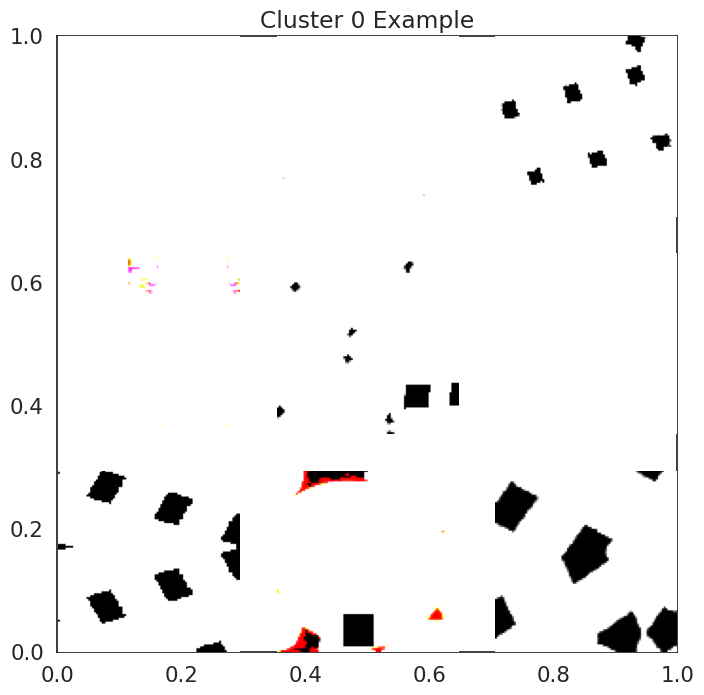

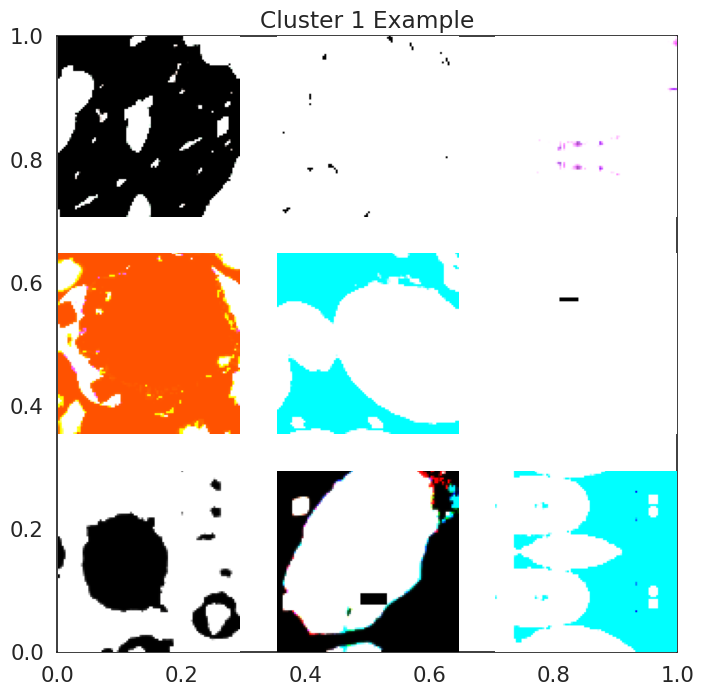

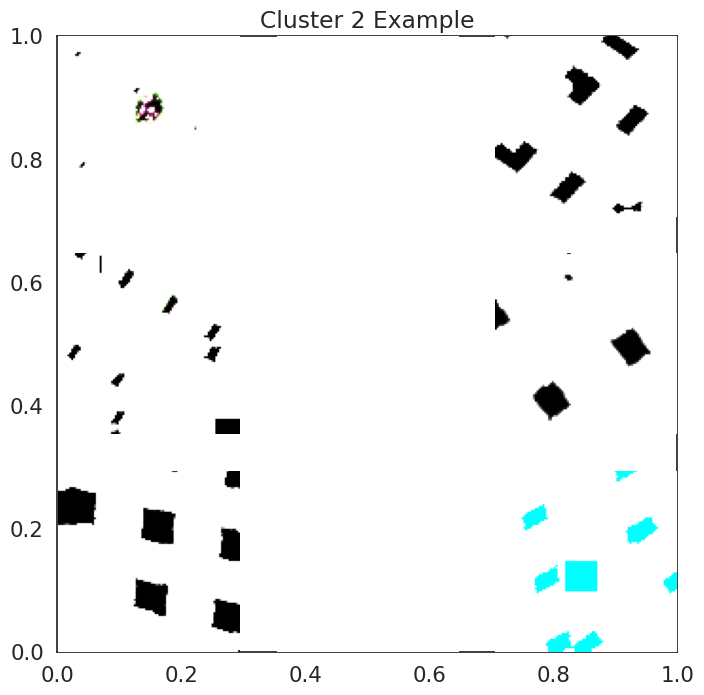

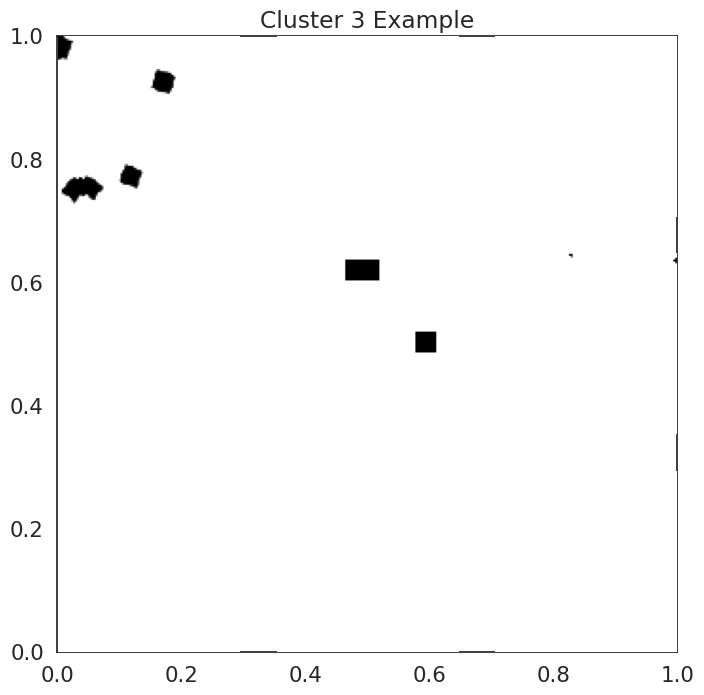

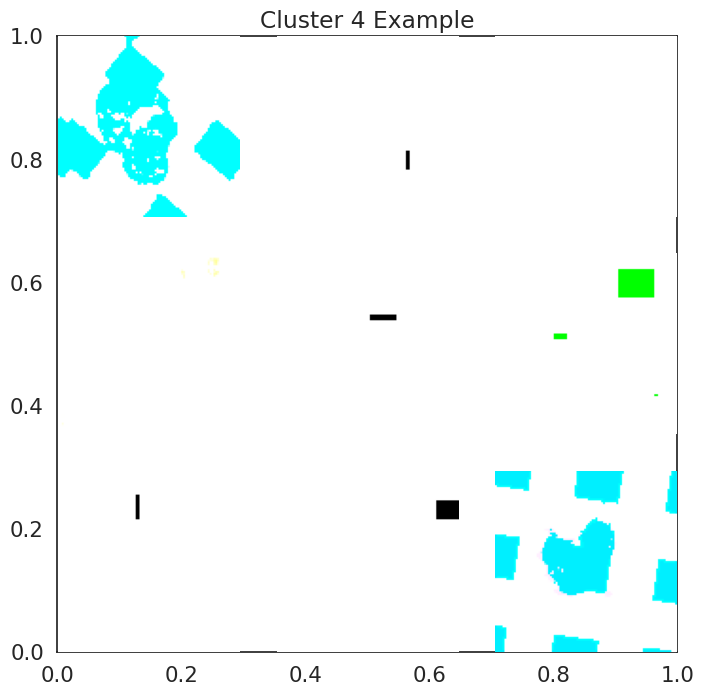

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

images = X_test_aug3
print("Original image shape:", images.shape)

# Flatten each image into a 1D array
n_samples, height, width, channels = images.shape
X = images.reshape(n_samples, height * width * channels)

# Apply k-means clustering
n_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Retrieve cluster labels
labels = kmeans.labels_
print("Cluster labels:", labels)

# Optional: Reshape labels back to image shape for visualization
clustered_images = labels.reshape(-1, 1)  # Example reshape for visualization

# Example: Visualize clustered images
for cluster in range(n_clusters):
    plt.figure(figsize=(8, 8))
    cluster_indices = np.where(labels == cluster)[0]
    plt.title(f"Cluster {cluster} Example")
    for i, idx in enumerate(cluster_indices[:9]):  # Show up to 9 examples per cluster
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx])
        plt.axis('off')
    plt.show()


### Submit Section


In [ ]:
# Initialise MobileNetV3Small model with pretrained weights, for transfer learning
mobilenetf = tf.keras.applications.EfficientNetV2B3(
    include_top=False,
    input_shape=(96, 96, 3),
    weights="imagenet",
    input_tensor=None,
    pooling=False,
    classes=8,
    classifier_activation="softmax",
    name="efficientnetv2-b3",
)

# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor
mobilenetf.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')

# Pass augmented inputs through the MobileNetV3Small feature extractor
x = mobilenetf(inputs)

x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Add a batch normalization layer
x = tfkl.BatchNormalization(name='batch_norm')(x)

# Add a dropout layer for regularization
x = tfkl.Dropout(0.4, name='dropout')(x)

# Add a dense layer with 256 units and GELU activation
x = tfkl.Dense(256, activation='gelu', name='dense1')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm1')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout2')(x)

# Add a second dense layer with 128 un load_data("training_set.npz")its and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense2')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm2')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout3')(x)

# Add a third dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense3')(x)
'''
# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm3')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout4')(x)
'''
# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(8, activation='softmax', name='output')(x)

# Define the complete model linking input and output
tlf_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with categorical cross-entropy loss and Adam optimiser
tlf_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

# Display a summary of the model architecture

# Load the saved weights
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras.weights.h5'  # replace <final_val_accuracy> with the actual accuracy
tlf_model.load_weights(model_filename)

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
tlf_model.save(model_filename)



In [35]:
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""

In [36]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('Blood_Cells_MobileNetV3S_98.27.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Overwriting model.py


In [37]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
# The original path was incorrect. Using f-string to format correctly.
!zip {filename} model.py Blood_Cells_MobileNetV3S_98.27.keras

  adding: model.py (deflated 54%)
  adding: Blood_Cells_MobileNetV3S_98.27.keras (deflated 7%)
